<a href="https://colab.research.google.com/github/plotnikovnikita1990/netology/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%9F%D1%83%D1%82%D1%8C_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка и просмотр данных

In [ ]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head(50)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1
5,2601,4,18.355521,46.301291,Premium,0
6,2710,4,23.825352,2.142234,Comfort,1
7,2911,7,19.491440,42.587786,Premium,1
8,2948,6,18.996947,67.540478,Premium,1
9,3013,2,15.692942,33.417278,Delivery,1


Формирование выборок по классe поездки

In [ ]:
df_1 = df[df['offer_class_group'] == 'Economy']
df_2 = df[df['offer_class_group'] == 'Comfort']

print('Выборкки имеют одинаковую длинну: ', len(df_1) == len(df_2))

Выборкки имеют одинаковую длинну:  True


графики плотности распределения дистанций поездок для классов Economy и Comfort

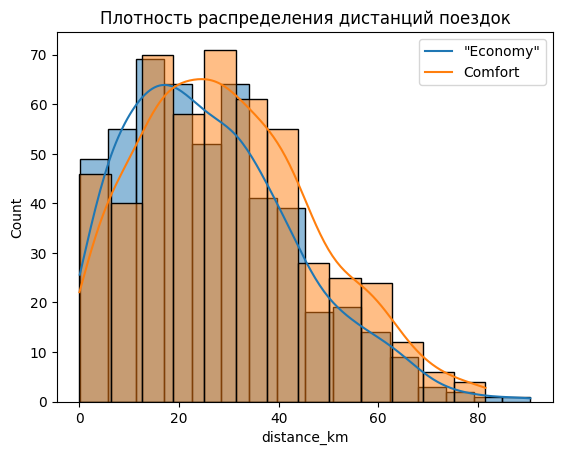

In [ ]:
sns.histplot(df_1['distance_km'], kde=True)
sns.histplot(df_2['distance_km'], kde=True)
plt.title('Плотность распределения дистанций поездок')
plt.legend(['"Economy"', 'Comfort'])
plt.show()

Распределение похоже на нормальное. Графики имеют явное пересечение

In [ ]:
Подключения библиотек статистических критериев и задание уровня значимости

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05

Н0 - Для дальних поездок пользователи выбирают Economy-класс на ровне с Comfort-классом

Н1 - На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе

In [ ]:
result = ttest_ind(df_1['distance_km'], df_2['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


**Вывод: На дальние поездки пользователи предпочитают комфортные условия поездки в Comfort-классе**

Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [ ]:
result = mannwhitneyu(df_1['distance_km'], df_2['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00128491
Отвергаем нулевую гипотезу
